In [10]:
elements = {'C' : 12,
            'H' : 1.007825035,
            'N': 14.003074000,
            'O' : 15.994914630,
            'P' : 30.973762000,
            'S' : 31.972070700,
            'Cl': 34.968853,
            'Na': 22.989770
            }

element_limits = {'C' : [0,20],
                    'H' : [0,50],
                    'N': [0,20],
                    'O' : [0,20],
                    'P' : [0,3],
                    'S' : [0,3],
                    'Cl': [0,1],
                    'Na': [0,1]}

In [11]:
import itertools
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

def build_delta_dict(element_masses, element_limits, precision_limit):

    #get possible deltas for each element
    masses = np.zeros(len(element_masses))

    #build delta list in order
    element_deltas = list()
    i = 0
    for i, (element, mass) in enumerate(element_masses.items()):

        #add the mz for this element
        masses[i] = round(mass, precision_limit)

        #get an array of all possible element count changes
        element_deltas.append(list(range(element_limits[element][0], element_limits[element][1] + 1)))

    #get all possible combinations of individual element count changes
    element_deltas = np.array(list(itertools.product(*element_deltas)))

    #get mass of each combination
    delta_masses = element_deltas @ masses

    #create mapping of delta value to possible compositions
    delta_dict = defaultdict(list)
    for delta, element_composition in zip(delta_masses, element_deltas):

        delta_dict[delta].append(element_composition)

    return delta_dict



In [12]:
yoop = build_delta_dict(elements, element_limits, 4)

In [ ]:
def break_formula(formula):

    composition = {'C' : 0,
                    'H' : 0,
                    'N': 0,
                    'O' : 0,
                    'P' : 0,
                    'S' : 0,
                    'Cl': 0,
                    'Na': 0}
    
    stringitem = ''
    intitem = '0'

    try:
        for i in formula:

            if i.isdigit():

                intitem += i

            else:

                if intitem != '0':

                    composition[stringitem] += int(intitem)
                    stringitem = ''
                    intitem = '0'

                if i.isupper() and stringitem != '': 
                    composition[stringitem] += 1
                    stringitem = ''
                    intitem = '0'

                stringitem += i

        composition[stringitem] += max(int(intitem), 1)

        return composition
    
    except:
        return {}

with open('/Users/jonahpoczobutt/Downloads/nist20.msp', 'r') as handle:

    lines = handle.readlines()

formulae = [i.split(' ')[1][:-2] for i in lines if 'formula' in i.lower()]
mzs = [float(i.split(' ')[1][:-2]) for i in lines if 'precursormz' in i.lower()]
compositions = [break_formula(i) for i in formulae]


In [4]:
len([i for i in formulae if 'Cu' in i])

78

In [ ]:
mz_threshold = 500

NameError: name 'np' is not defined

C
8
1
H
1
4
2
O
1
7
P


{'C': 81, 'H': 142, 'N': 0, 'O': 17, 'P': 1, 'S': 0, 'Cl': 0, 'Na': 0}

In [29]:
formulae[0]

'C81H142O17P'

In [17]:
mzs

[1467.006,
 1467.006,
 1467.006,
 1467.006,
 1467.006,
 1467.006,
 1467.006,
 1471.961,
 1471.961,
 1471.961,
 723.478,
 723.478,
 723.478,
 723.478,
 1493.943,
 1447.964,
 1447.964,
 1447.964,
 1447.964,
 1447.964,
 1449.98,
 1449.98,
 1449.98,
 1449.98,
 1449.98,
 863.564,
 786.6,
 786.6,
 786.6,
 786.6,
 786.6,
 786.6,
 786.6,
 786.6,
 786.6,
 786.6,
 786.6,
 786.6,
 786.6,
 808.582,
 808.582,
 808.582,
 808.582,
 808.582,
 744.553,
 744.553,
 744.553,
 744.553,
 744.553,
 744.553,
 504.308,
 504.308,
 504.308,
 504.308,
 504.308,
 504.308,
 504.308,
 504.308,
 504.308,
 504.308,
 504.308,
 504.308,
 504.308,
 1516.131,
 1516.131,
 758.569,
 758.569,
 758.569,
 758.569,
 758.569,
 758.569,
 758.569,
 758.569,
 758.569,
 758.569,
 758.569,
 758.569,
 758.569,
 758.569,
 780.551,
 780.551,
 780.551,
 780.551,
 780.551,
 780.551,
 762.6,
 784.582,
 784.582,
 784.582,
 760.585,
 760.585,
 760.585,
 760.585,
 760.585,
 760.585,
 760.585,
 760.585,
 760.585,
 782.56,
 782.56,
 782.56,
 78

In [6]:
yoop

defaultdict(list,
            {0.0: [array([0, 0, 0, 0, 0, 0, 0, 0])],
             22.9898: [array([0, 0, 0, 0, 0, 0, 0, 1])],
             34.9689: [array([0, 0, 0, 0, 0, 0, 1, 0])],
             57.95869999999999: [array([0, 0, 0, 0, 0, 0, 1, 1])],
             31.9721: [array([0, 0, 0, 0, 0, 1, 0, 0])],
             54.9619: [array([0, 0, 0, 0, 0, 1, 0, 1])],
             66.941: [array([0, 0, 0, 0, 0, 1, 1, 0])],
             89.9308: [array([0, 0, 0, 0, 0, 1, 1, 1])],
             63.9442: [array([0, 0, 0, 0, 0, 2, 0, 0])],
             86.934: [array([0, 0, 0, 0, 0, 2, 0, 1])],
             98.9131: [array([0, 0, 0, 0, 0, 2, 1, 0])],
             121.90289999999999: [array([0, 0, 0, 0, 0, 2, 1, 1])],
             95.9163: [array([0, 0, 0, 0, 0, 3, 0, 0])],
             118.90610000000001: [array([0, 0, 0, 0, 0, 3, 0, 1])],
             130.8852: [array([0, 0, 0, 0, 0, 3, 1, 0])],
             153.875: [array([0, 0, 0, 0, 0, 3, 1, 1])],
             127.8884: [array([0, 0, 0, 0, 

In [9]:
max(yoop)

1232.8042

(array([3.830239e+06, 9.153320e+05, 8.281200e+05, 3.617430e+05,
        2.745820e+05, 2.835430e+05, 1.121310e+05, 7.921400e+04,
        1.519700e+04, 1.898000e+03]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <BarContainer object of 10 artists>)

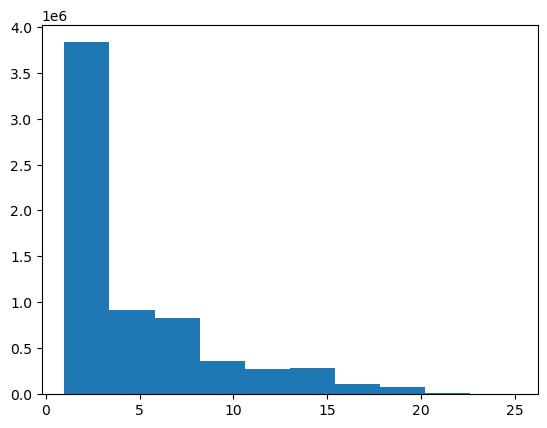

In [14]:
plt.hist([len(i) for i in yoop.values()])

In [30]:
boop

array([  0.    ,  31.9721,  30.9738,  62.9459,  15.9949,  47.967 ,
        46.9687,  78.9408,  14.0031,  45.9752,  44.9769,  76.949 ,
        29.998 ,  61.9701,  60.9718,  92.9439,   1.0078,  32.9799,
        31.9816,  63.9537,  17.0027,  48.9748,  47.9765,  79.9486,
        15.0109,  46.983 ,  45.9847,  77.9568,  31.0058,  62.9779,
        61.9796,  93.9517,  12.    ,  43.9721,  42.9738,  74.9459,
        27.9949,  59.967 ,  58.9687,  90.9408,  26.0031,  57.9752,
        56.9769,  88.949 ,  41.998 ,  73.9701,  72.9718, 104.9439,
        13.0078,  44.9799,  43.9816,  75.9537,  29.0027,  60.9748,
        59.9765,  91.9486,  27.0109,  58.983 ,  57.9847,  89.9568,
        43.0058,  74.9779,  73.9796, 105.9517])